# Случайный лес

В этом практическом задании вы решите задачу регрессии на реальных данных при помощи линейной модели и случайного леса. 

## Цели практической работы

* Научиться применять случайный лес в задаче регрессии.
* Научиться сравнивать качество случайного леса с качеством линейной модели.
* Научиться настраивать гиперпараметры леса.

## Что входит в работу

* Выполнить предобработку данных.
* Обучить линейную регрессию на данных задачи.
* Обучить случайный лес на данных задачи.
* Подобрать гиперпараметры для леса.
* Визуализировать важность признаков у леса.

## Что оценивается

*  Все ячейки заполнены; при запуске ячеек  Python не выдаёт информацию об ошибках.
*  Качество итоговой модели $R^2$ превышает 0,95.


## Что нужно сделать

Постройте модели, предсказывающие стоимость автомобилей по характеристикам.

Признаков у машин много, но в этой работе обойдёмся только числовыми признаками:
*  year — год производства автомобиля;
*  km_driven — пробег;
*  seats — количество посадочных мест;
*  mileage — другая характеристика пробега;
*  engine — мощность двигателя;
*  max_power — мощность автомобиля.

Целевая переменная — selling_price.

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [7]:
import warnings
warnings.simplefilter("ignore")

In [4]:
train = pd.read_csv("cars_train.csv")
test = pd.read_csv("cars_test.csv")

В тренировочных данных есть автомобили, для которых неизвестна стоимость. Удалите эти автомобили из трейна.

In [ ]:
train = train[train["selling_price"].notnull()]

Создайте объекты Xtrain, ytrain, Xtest, ytest. Запишите в них матрицы «объект — признак» и векторы целевой переменной для тренировочного и тестового датасетов.

In [ ]:
X_train = train[["year", "km_driven", "seats", "engine", "mileage", "max_power"]]
y_train = train["selling_price"]
X_test = test[["year", "km_driven", "seats", "engine", "mileage", "max_power"]]
y_test = test["selling_price"]

Перед обучением моделей обработайте данные.

Обратите внимание, что столбцы mileage, engine и max_power по смыслу числовые. Чтобы превратить их в числовые столбцы, отбросьте единицы измерения и оставьте только числа. В столбцах есть пропущенные значения, их при обработке трогать не нужно.

In [ ]:
def convert_to_numeric(col):
    return col.str.replace(r"[^0-9.]", "", regex=True).astype(float)


X_train["mileage"] = convert_to_numeric(X_train["mileage"])
X_train["engine"] = convert_to_numeric(X_train["engine"])
X_train["max_power"] = convert_to_numeric(X_train["max_power"])

X_test["mileage"] = convert_to_numeric(X_test["mileage"])
X_test["engine"] = convert_to_numeric(X_test["engine"])
X_test["max_power"] = convert_to_numeric(X_test["max_power"])

In [9]:
X_test.head()

,year,km_driven,seats,engine,mileage,max_power
0,2010,168000,7.0,2498.0,14.0,112.0
1,2017,25000,5.0,1497.0,21.5,108.5
2,2007,218463,5.0,1799.0,12.9,130.0
3,2015,173000,5.0,1498.0,25.1,98.6
4,2011,70000,5.0,1172.0,16.5,65.0


Оставьте в данных только шесть числовых столбцов:

year, km_driven, seats, engine, mileage, max_power

In [ ]:
X_train = X_train[["year", "km_driven", "seats", "engine", "mileage", "max_power"]]
X_test = X_test[["year", "km_driven", "seats", "engine", "mileage", "max_power"]]

Теперь заполните пропуски следующим образом:

*    вычислите средние значения по столбцам тренировочной выборки;

*    добавьте в пропуски в тренировочных и тестовых данных вычисленные средние.

In [11]:
mean_values = X_train.mean()

X_train.fillna(mean_values, inplace=True)
X_test.fillna(mean_values, inplace=True)

Теперь на обработанных тренировочных данных обучите:

*  линейную регрессию,
*  случайный лес с параметрами по умолчанию.

На обработанных тестовых данных сделайте предсказание и вычислите метрику $R^2$. 

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"R^2 линейной регрессии: {r2_lin}")
print(f"R^2 случайного леса: {r2_rf}")

R^2 линейной регрессии: 0.6485839251280137
R^2 случайного леса: 0.9629520400960621


Какая модель получилась лучше?

Модель RandomForest

Улучшите качество предсказания случайного леса путём подбора гиперпараметров:

*   n_estimators,
*   max_depth,
*   max_features,
*   min_samples_leaf,
*   min_samples_split.

Для подбора гиперпараметров используйте GridSearchCV. Обучайте GridSearchCV по тренировочным данным с разбивкой на три фолда и метрикой $R^2$.

In [13]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "max_features": ["auto", "sqrt", "log2"],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 10],
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    scoring="r2",
    cv=3,
    verbose=2,
    n_jobs=-1,
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


Теперь обучите на тренировочных данных случайный лес с найденными гиперпараметрами. Сделайте предсказание на тестовых данных и оцените его качество ($R^2$).

In [ ]:
y_pred_best_rf = best_rf.predict(X_test)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Лучшие гиперпараметры: {grid_search.best_params_}")
print(f"R^2 с оптимизированным случайным лесом: {r2_best_rf}")

Лучшие гиперпараметры: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R^2 с оптимизированным случайным лесом: 0.9640757124077554


Модель готова. Осталось её проинтерпретировать.

При помощи метода model.feature_importances_ визуализируйте гистограмму важности признаков у случайного леса с настроенными гиперпараметрами.

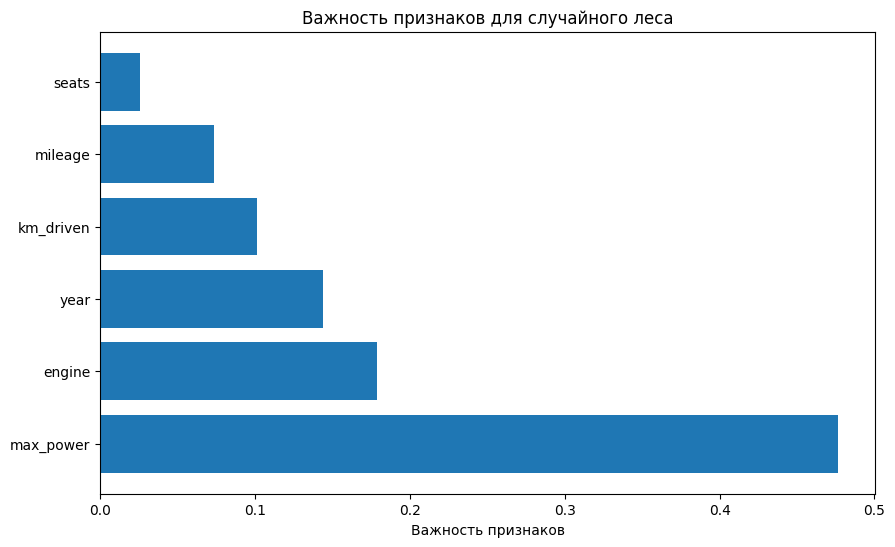

In [ ]:
importances = best_rf.feature_importances_
features = X_train.columns

feature_importances = pd.DataFrame({"feature": features, "importance": importances})
feature_importances.sort_values(by="importance", ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances["feature"], feature_importances["importance"])
plt.xlabel("Важность признаков")
plt.title("Важность признаков для случайного леса")
plt.show()